In [16]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv("data/city_data.csv")
ride_data = pd.read_csv("data/ride_data.csv")
# Combine the data into a single dataset

merged_data = pd.merge(ride_data, city_data, on = "city", how = "left")
# Display the data table for preview
merged_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [17]:
#obtaining x and y coordinates for urban cities
urban = merged_data.loc[merged_data["type"] == "Urban", ["city", "fare", "driver_count"]]
urban_cities = urban["city"].value_counts().reset_index()
urban_data = urban.groupby(["city"])
urban_fare = urban_data["fare","driver_count"].mean().reset_index()
urban_cities_renamed = urban_cities.rename(
    columns={
    "index": "City",
    "city": "Rides per City"
})
urban_fare_renamed = urban_fare.rename(
columns={
    "city": "City",
    "fare": "Average Fare",
    "driver_count": "Driver Count"
})
#data on urban cities required for the plot
final_urban = pd.merge(urban_fare_renamed, urban_cities_renamed, on = "City")

In [18]:
#obtaining x and y coordinates for rural cities
rural = merged_data.loc[merged_data["type"] == "Rural", ["city", "fare", "driver_count"]]
rural_cities = rural["city"].value_counts().reset_index()
rural_data = rural.groupby(["city"])
rural_fare = rural_data["fare","driver_count"].mean().reset_index()
rural_cities_renamed = rural_cities.rename(
    columns={
    "index": "City",
    "city": "Rides per City"
})
rural_fare_renamed = rural_fare.rename(
columns={
    "city": "City",
    "fare": "Average Fare",
    "driver_count": "Driver Count"
})
#data on rural cities required for the plot
final_rural = pd.merge(rural_fare_renamed, rural_cities_renamed, on = "City")

In [19]:
#obtaining x and y coordinates for suburban cities
suburban = merged_data.loc[merged_data["type"] == "Suburban", ["city", "fare", "driver_count"]]
suburban_cities = suburban["city"].value_counts().reset_index()
suburban_data = suburban.groupby(["city"])
suburban_fare = suburban_data["fare","driver_count"].mean().reset_index()
suburban_cities_renamed = suburban_cities.rename(
    columns={
    "index": "City",
    "city": "Rides per City"
})
suburban_fare_renamed = suburban_fare.rename(
columns={
    "city": "City",
    "fare": "Average Fare",
    "driver_count": "Driver Count"
})
#data on suburban cities for plot
final_suburban = pd.merge(suburban_fare_renamed, suburban_cities_renamed, on = "City")

## Bubble Plot of Ride Sharing Data

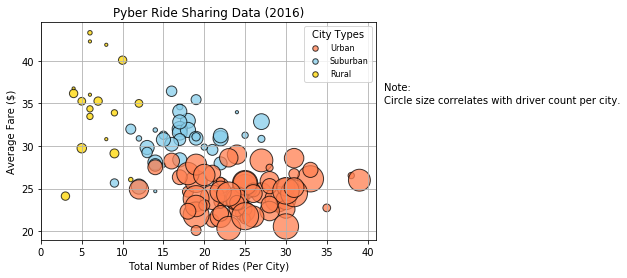

In [33]:

# Build the scatter plots for each city types
Suburban = plt.scatter(final_suburban["Rides per City"], final_suburban["Average Fare"], marker="o", facecolors="skyblue", edgecolors="black", s=10*final_suburban["Driver Count"],alpha = 0.75)
Urban = plt.scatter(final_urban["Rides per City"], final_urban["Average Fare"], marker="o", facecolors="coral", edgecolors="black", s=10*final_urban["Driver Count"], alpha = 0.75)
Rural = plt.scatter(final_rural["Rides per City"], final_rural["Average Fare"], marker="o", facecolors="gold", edgecolors="black", s=10*final_rural["Driver Count"], alpha = 0.75)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.xlim(0, 41)
plt.ylim(19,44.5)
plt.grid()

# Create a legend
lgnd = plt.legend([Urban, Suburban, Rural], ["Urban", "Suburban", "Rural"], fontsize = 8, markerscale = 0.5, title = "City Types")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42, 36.5, 'Note:')
plt.text(42, 35, 'Circle size correlates with driver count per city.')

# Save Figure
plt.savefig("../Images/ride_sharing_data.png")

#Show plot
plt.show()

## Total Fares by City Type

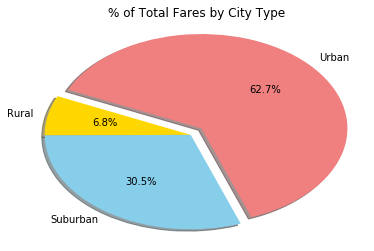

In [24]:
# Calculate Type Percents
rural_fares = rural["fare"].sum()
urban_fares = urban["fare"].sum()
suburban_fares = suburban["fare"].sum()

# Build Pie Chart
labels = ["Urban","Rural", "Suburban"]
sizes = [urban_fares, rural_fares, suburban_fares]
colors = ["lightcoral","gold", "skyblue"]
explode = (0.1, 0, 0)
ax = plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=290)
plt.title("% of Total Fares by City Type")
plt.axis("tight")
# Save Figure
plt.savefig("../Images/fares_by_city.png")
plt.show()

## Total Rides by City Type

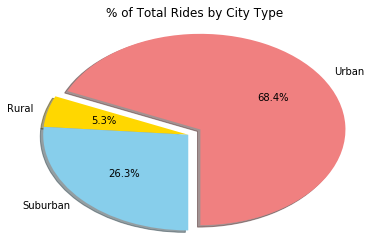

In [26]:
# Calculate Ride Percents
suburban_rides = suburban_cities_renamed["Rides per City"].sum()
urban_rides = urban_cities_renamed["Rides per City"].sum()
rural_rides = rural_cities_renamed["Rides per City"].sum()
# Build Pie Chart
labels = ["Urban","Rural", "Suburban"]
sizes = [urban_rides, rural_rides, suburban_rides]
colors = ["lightcoral","gold", "skyblue"]
explode = (0.1, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=270)
plt.title("% of Total Rides by City Type")
plt.axis("tight")

# Save Figure
plt.savefig("../Images/rides_by_city.png")
plt.show()

## Total Drivers by City Type

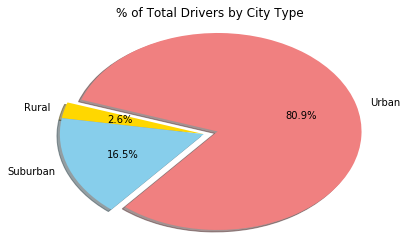

In [28]:
# Calculate Driver Percents
suburban_drivers = suburban_fare_renamed["Driver Count"].sum()
urban_drivers = urban_fare_renamed["Driver Count"].sum()
rural_drivers = rural_fare_renamed["Driver Count"].sum()
# Build Pie Charts
labels = ["Urban","Rural", "Suburban"]
sizes = [urban_drivers, rural_drivers, suburban_drivers]
colors = ["lightcoral","gold", "skyblue"]
explode = (0.1, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=230)
plt.title("% of Total Drivers by City Type")
plt.axis("tight")
# Save Figure
plt.savefig("../Images/drivers_by_city.png")
plt.show()

In [34]:
'''
TRENDS OBSERVED
1. Rides per city is higher for urban cities compared to rural cities.
2. Average fares are lower for urban cities compared to suburban and rural cities.
3.Proportion of total fares, total rides, and total number of drivers is highest for urban areas followed by suburban areas and rural areas.'''

'\nTRENDS OBSERVED\n1. Rides per city is higher for urban cities compared to rural cities.\n2. Average fares are lower for urban cities compared to suburban and rural cities.\n3.Proportion of total fares, total rides, and total number of drivers is highest for urban areas followed by suburban areas and rural areas.'